# Problem Statement :-

    Data Visualization I
        1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the
            passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find
            any patterns in the data.
        2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is
            distributed by plotting a histogram.

## Importing Libraries and dataset

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [28]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handling Null Values

In [29]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
df.drop(['deck'], axis = 1, inplace = True)

In [32]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [33]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)
df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [34]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [35]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace = True)
df['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [37]:
df['age'].fillna(df['age'].mean(), inplace = True)

In [38]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Taks1:

# Distributional Plots

## The Dist Plot

<AxesSubplot:xlabel='fare'>

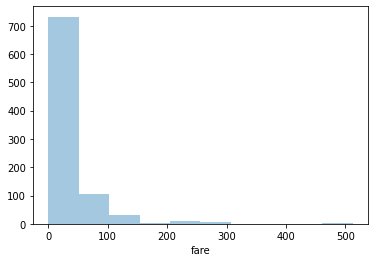

In [57]:
sns.distplot(df['fare'], kde=False, bins=10)
# You can clearly see that for more than 700 passengers, the ticket price is between 0 and 50

## The Joint Plot 

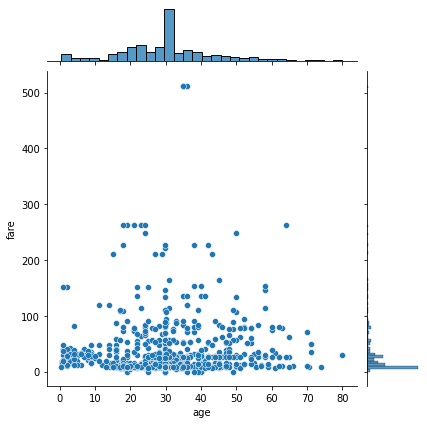

In [59]:
sns.jointplot(x='age', y='fare', data=df)
# You can see that there is no correlation observed between age and the fares.

## The Rug Plot

<AxesSubplot:xlabel='fare'>

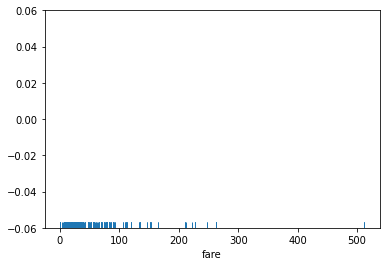

In [61]:
sns.rugplot(df['fare'])
# most of the instances for the fares have values between 0 and 100.

# Categorical Plots

## The Bar Plot 

<AxesSubplot:xlabel='sex', ylabel='age'>

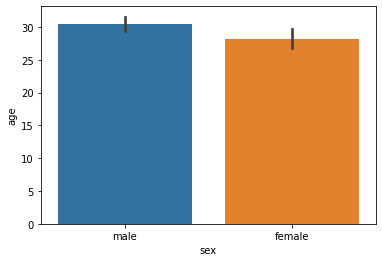

In [63]:
sns.barplot(x='sex', y='age', data=df)
#The average age of male passengers is around 30 while the average age of female passengers is just less than 30.

<AxesSubplot:xlabel='embarked', ylabel='age'>

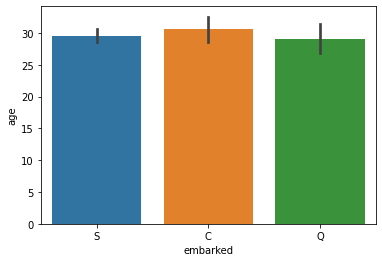

In [73]:
sns.barplot(x='embarked', y='age', data=df)

## The Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

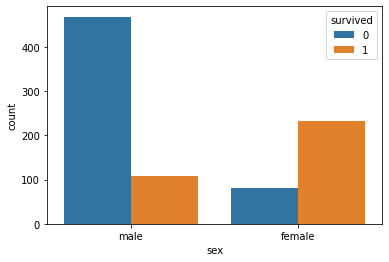

In [71]:
sns.countplot(x='sex', hue = 'survived', data=df)
# Displays the count of the categories in a specific column

<AxesSubplot:xlabel='class', ylabel='count'>

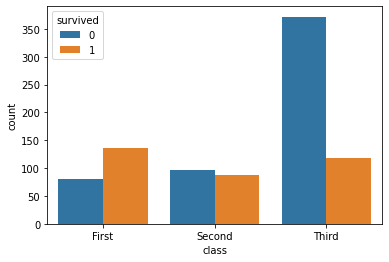

In [72]:
sns.countplot(x = 'class', hue = 'survived', data = df)

## The Box Plot 

<AxesSubplot:xlabel='sex', ylabel='age'>

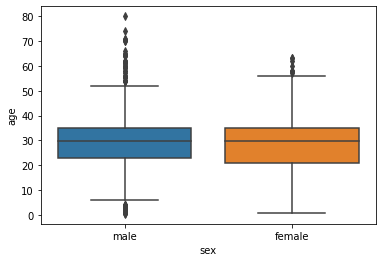

In [66]:
sns.boxplot(x='sex', y='age', data=df)
# male=> 1st quartile:(5-22) 2nd quartile:(23-30) 3rd quartile:(31-35) 4th quartile:(36-52) 

In [24]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.253236,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.253236,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.404744,1.000000


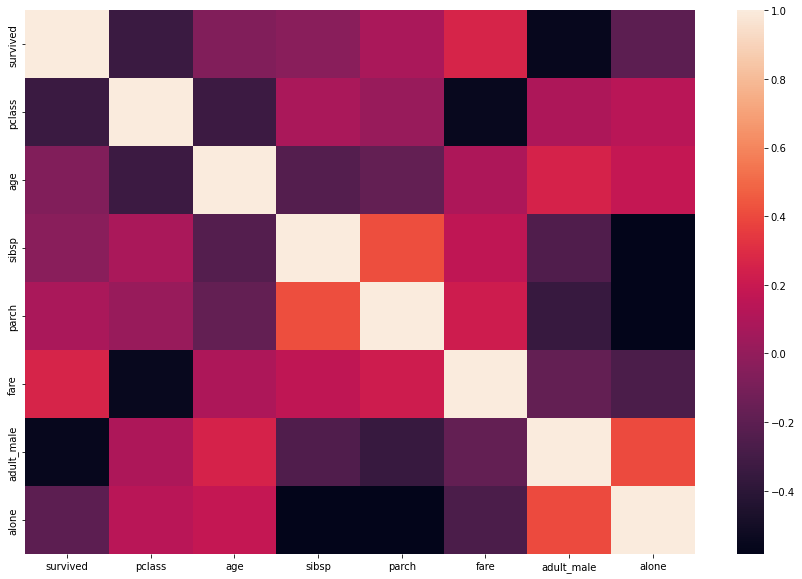

In [41]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df.corr())

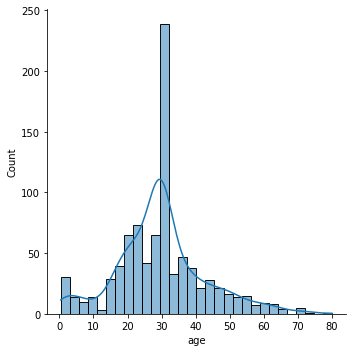

In [68]:
sns.displot(df, x = 'age', kde = True)
# most of the passengers age is between 30 to 33

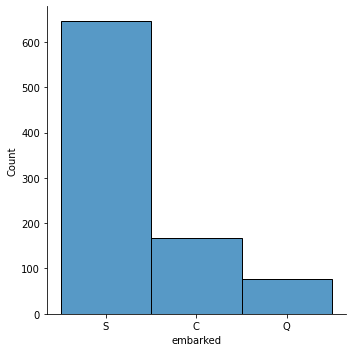

In [43]:
sns.displot(df, x = 'embarked')
# most of the passengers are from SouthHampton

# Task2:

<AxesSubplot:xlabel='who', ylabel='fare'>

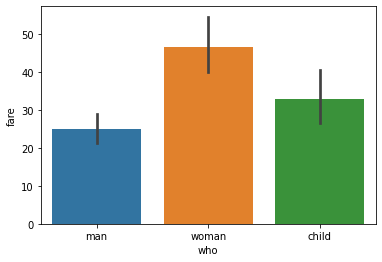

In [53]:
sns.barplot(data = df, y = 'fare', x = 'who')

<AxesSubplot:xlabel='sex', ylabel='fare'>

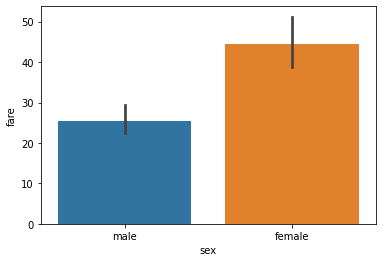

In [54]:
sns.barplot(data = df, y = 'fare', x = 'sex')

<AxesSubplot:xlabel='alone', ylabel='fare'>

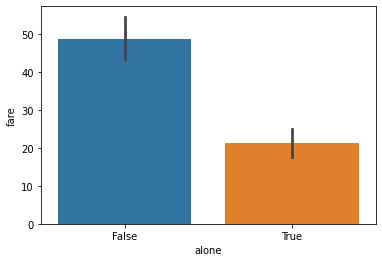

In [55]:
sns.barplot(data = df, y = 'fare', x = 'alone')

<AxesSubplot:xlabel='embarked', ylabel='fare'>

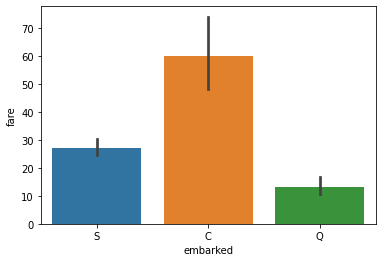

In [74]:
sns.barplot(data = df, y = 'fare', x = 'embarked')

<AxesSubplot:xlabel='pclass', ylabel='fare'>

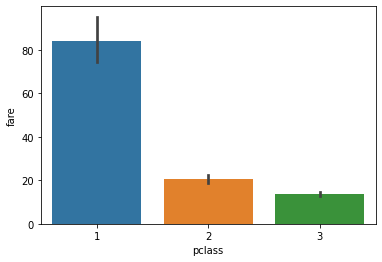

In [75]:
sns.barplot(data = df, y = 'fare', x = 'pclass')